# **Final Piala Dunia 2022 Qatar: Bagaimana Respons Masyarakat Indonesia Terhadap Kemenangan Argentina?**

# **Module**

In [ ]:
!pip install clean-text
!pip install Sastrawi
!pip install unidecode
!pip install swifter
!pip install pyLDAvis
!pip install chart_studio
!pip install scipy==1.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 2.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=76c389e974606833207b99d9c7e9368f844ad0fbb2ce244d3d6f399b262ce9d2
  Stored in directory: /root/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 1.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 5.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=1508da2d967d37c43c4b99afdc5746517ba674d99da803b7d72696a50ea43572
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=12c86f43c24fb14055bd9bc15003778657d93a6072b8235934b6a83b404e8911
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn
Looking in indexes: https://pypi.org/si

In [ ]:
import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
from bs4 import BeautifulSoup

factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170

In [ ]:
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse
import nltk
from scipy.sparse import coo_array

#EDA
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from tqdm import tqdm
import os
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

#preprocessing and scoring
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.probability import FreqDist
#models and algos

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier


##customer pipeline function
from sklearn.base import BaseEstimator, TransformerMixin

#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# **Raw Data**

Data yang kami gunakan merupakan data hasil scrapping dari Twitter dengan menggunakan bantuan twint. Data kami mengambil 13 Kata Kunci, yaitu:

1. Menang piala dunia
2. Menang pildun
3. Final piala dunia
4. Final pildun
5. Final settingan
6. Argentina menang
7. Argentina juara
8. Argentina menang piala dunia
9. Argentina menang pildun
10. Argentina curang
11. Konspirasi final
12. Petisi final piala dunia
13. Wasit argentina

Pada selang tanggal 18 Desember 2022 sampai dengan 26 Desember 2022 yang kemudian terkumpul sebanyak 15894 baris dan 6 kolom.

Sebelum digunakan, dataset sudah dilakukan *pre-processing* sederhana dari Microsoft Excel secara langsung, yaitu mendelete kolom yang tidak diperlukan untuk dianalisis dan hanya menyisakan kolom time, username, tweet, replies_count, retweet_count, dan likes_count. Selain itu, kami juga melakukan *data understanding*.

In [ ]:
#Import Data
import pandas as pd
url = 'https://github.com/ainunsyafna/Project-Akhir-Datmin/blob/main/raw-data.xlsx?raw=true'
df = pd.read_excel(url)
df

,time,username,tweet,replies_count,retweets_count,likes_count
0,23:59:36,kabar6com,"Laga Final Piala Dunia, Bupati Zaki Jagokan Ar...",0.0,0.0,0.0
1,23:58:35,rrex_xona,asam lambung naek gara¬≤ nonton final piala du...,0.0,0.0,0.0
2,23:58:29,vanilamacaroon,Biasanya grup yang tahun ini menang piala duni...,0.0,0.0,0.0
3,23:58:12,aikel112629,@MardaniAliSera Logikanya..... Kalau seadanya ...,0.0,1.0,7.0
4,23:57:53,ggmujos,gila üî•üî•üî•üî• final piala dunia terbaik,0.0,0.0,0.0
...,...,...,...,...,...,...
15889,00:04:05,sipalingchou,"bangun bangun liat kabar argen menang, yaa iya...",0.0,0.0,0.0
15890,00:01:48,liluy,WOI ARGEN MENANG üò≠ü•∫ü•∞üíó,1.0,0.0,0.0
15891,00:01:39,nijuunanaa,w sbnrnya dukung perancis si agak sedih tp gpp...,1.0,0.0,0.0
15892,00:01:26,sundeady,argen menang cuy GOAT,0.0,0.0,0.0


# **Pre-*Processing* Raw Data**

In [ ]:
#Check Missing Value
df.isna().sum()

time              0
username          0
tweet             2
replies_count     5
retweets_count    5
likes_count       5
dtype: int64

In [ ]:
#Check Duplicate Data
df.duplicated().sum()

1432

In [ ]:
#Drop Missing Value
df = df.dropna()

In [ ]:
#Drop Duplicate Data
df = df.drop_duplicates()

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [ ]:
#Remove html Entities
from bs4 import BeautifulSoup
df['clean_tweet'] = df['tweet'].apply(lambda x: BeautifulSoup(x).text)

def remove_link(text):
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
  return text.replace("http://", " ").replace("https://", " ")
df['clean_tweet'] = df.clean_tweet.astype(str)
df['clean_tweet'] = df['clean_tweet'].apply(remove_link)

In [ ]:
#Remove Twitter Username (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['clean_tweet'], "@[\w]*")

In [ ]:
#Change All The Tweets Into Lowercase
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: x.lower())

In [ ]:
#Replace Special Characters with Space
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))

In [ ]:
#Replace Numbers (Integers) with Space
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))

In [ ]:
#Remove Words Whom Length is 1
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

**Removing Indonesian StopWords**

In [ ]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'd',
                       'klo', 'woi', 'kalo', 'amp', 'biar',
                       'bikin', 'bilang', 'gak', 'ga', 'krn',
                       'nya', 'nih', 'sih', 'si', 'tau', 'tdk',
                       'tuh', 'utk', 'ya', 'jd', 'jgn', 'sdh',
                       'aja', 'n', 't', 'nyg', 'hehe', 'wkwk',
                       'awokwok', 'pen', 'u', 'nan', 'loh',
                       'rt', '&amp', 'yah', 'cuy'])
list_stopwords = set(list_stopwords)

#clean stopwords
def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in list_stopwords) # hapus stopword dari kolom deskripsi
    return text
# Buat kolom tambahan untuk data description yang telah distopwordsremoval
df['clean_tweet'] = df['clean_tweet'].apply(clean_stopwords)
df

,time,username,tweet,replies_count,retweets_count,likes_count,clean_tweet
0,23:59:36,kabar6com,"Laga Final Piala Dunia, Bupati Zaki Jagokan Ar...",0.0,0.0,0.0,laga final piala dunia bupati zaki jagokan arg...
1,23:58:35,rrex_xona,asam lambung naek gara¬≤ nonton final piala du...,0.0,0.0,0.0,asam lambung naek gara nonton final piala duni...
2,23:58:29,vanilamacaroon,Biasanya grup yang tahun ini menang piala duni...,0.0,0.0,0.0,grup menang piala dunia depannya masuk perempa...
3,23:58:12,aikel112629,@MardaniAliSera Logikanya..... Kalau seadanya ...,0.0,1.0,7.0,logikanya seadanya lolos piala dunia semi fina...
4,23:57:53,ggmujos,gila üî•üî•üî•üî• final piala dunia terbaik,0.0,0.0,0.0,gila final piala dunia terbaik
...,...,...,...,...,...,...,...
15889,00:04:05,sipalingchou,"bangun bangun liat kabar argen menang, yaa iya...",0.0,0.0,0.0,bangun bangun liat kabar argen menang yaa iyal...
15890,00:01:48,liluy,WOI ARGEN MENANG üò≠ü•∫ü•∞üíó,1.0,0.0,0.0,argen menang
15891,00:01:39,nijuunanaa,w sbnrnya dukung perancis si agak sedih tp gpp...,1.0,0.0,0.0,sbnrnya dukung perancis sedih gpp argen menang
15892,00:01:26,sundeady,argen menang cuy GOAT,0.0,0.0,0.0,argen menang goat


**Handling Slang**

In [ ]:
slang = 'https://github.com/ainunsyafna/Project-Akhir-Datmin/blob/main/slang.xlsx?raw=true'
word_slang = pd.read_excel(slang)

word_slang_dict = {}
for index, row in word_slang.iterrows():
    if row[0] not in word_slang_dict:
        word_slang_dict[row[0]] = row[1]

def clean_slang(text):
    text = ' '.join(word for word in text.split() if word not in word_slang_dict) # hapus stopword dari kolom deskripsi
    return text

df['clean_tweet'] = df['clean_tweet'].apply(clean_slang)
df

,time,username,tweet,replies_count,retweets_count,likes_count,clean_tweet
0,23:59:36,kabar6com,"Laga Final Piala Dunia, Bupati Zaki Jagokan Ar...",0.0,0.0,0.0,laga final piala dunia bupati zaki jagokan arg...
1,23:58:35,rrex_xona,asam lambung naek gara¬≤ nonton final piala du...,0.0,0.0,0.0,asam lambung gara nonton final piala dunia anj...
2,23:58:29,vanilamacaroon,Biasanya grup yang tahun ini menang piala duni...,0.0,0.0,0.0,grup menang piala dunia depannya masuk perempa...
3,23:58:12,aikel112629,@MardaniAliSera Logikanya..... Kalau seadanya ...,0.0,1.0,7.0,logikanya seadanya lolos piala dunia semi fina...
4,23:57:53,ggmujos,gila üî•üî•üî•üî• final piala dunia terbaik,0.0,0.0,0.0,gila final piala dunia terbaik
...,...,...,...,...,...,...,...
15889,00:04:05,sipalingchou,"bangun bangun liat kabar argen menang, yaa iya...",0.0,0.0,0.0,bangun bangun kabar argen menang iyalah udah
15890,00:01:48,liluy,WOI ARGEN MENANG üò≠ü•∫ü•∞üíó,1.0,0.0,0.0,argen menang
15891,00:01:39,nijuunanaa,w sbnrnya dukung perancis si agak sedih tp gpp...,1.0,0.0,0.0,dukung perancis sedih argen menang
15892,00:01:26,sundeady,argen menang cuy GOAT,0.0,0.0,0.0,argen menang goat


**Lemmatization**\
lemmatization akan menghasilkan kata baku (*dictionary word*) dan bergantung konteks.

In [ ]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m spacy download en_core_web_lg

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-13 11:25:18.725610: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
def get_lemmas(text):
    '''Used to lemmatize the processed tweets'''
    lemmas = []

    doc = nlp(text)

    # Something goes here :P
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)

    return lemmas

df['lemmas'] = df['clean_tweet'].apply(get_lemmas)
df

,time,username,tweet,replies_count,retweets_count,likes_count,clean_tweet,lemmas
0,23:59:36,kabar6com,"Laga Final Piala Dunia, Bupati Zaki Jagokan Ar...",0.0,0.0,0.0,laga final piala dunia bupati zaki jagokan arg...,"[laga, final, piala, dunia, bupati, zaki, jago..."
1,23:58:35,rrex_xona,asam lambung naek gara¬≤ nonton final piala du...,0.0,0.0,0.0,asam lambung gara nonton final piala dunia anj...,"[asam, lambung, gara, nonton, final, piala, du..."
2,23:58:29,vanilamacaroon,Biasanya grup yang tahun ini menang piala duni...,0.0,0.0,0.0,grup menang piala dunia depannya masuk perempa...,"[grup, menang, piala, dunia, depannya, masuk, ..."
3,23:58:12,aikel112629,@MardaniAliSera Logikanya..... Kalau seadanya ...,0.0,1.0,7.0,logikanya seadanya lolos piala dunia semi fina...,"[logikanya, seadanya, lolos, piala, dunia, sem..."
4,23:57:53,ggmujos,gila üî•üî•üî•üî• final piala dunia terbaik,0.0,0.0,0.0,gila final piala dunia terbaik,"[gila, final, piala, dunia, terbaik]"
...,...,...,...,...,...,...,...,...
15889,00:04:05,sipalingchou,"bangun bangun liat kabar argen menang, yaa iya...",0.0,0.0,0.0,bangun bangun kabar argen menang iyalah udah,"[bangun, bangun, kabar, argen, menang, iyalah,..."
15890,00:01:48,liluy,WOI ARGEN MENANG üò≠ü•∫ü•∞üíó,1.0,0.0,0.0,argen menang,"[argen, menang]"
15891,00:01:39,nijuunanaa,w sbnrnya dukung perancis si agak sedih tp gpp...,1.0,0.0,0.0,dukung perancis sedih argen menang,"[dukung, perancis, sedih, argen, menang]"
15892,00:01:26,sundeady,argen menang cuy GOAT,0.0,0.0,0.0,argen menang goat,"[argen, menang, goat]"


# **Data Setelah Di-*translate***

Pada proses Polaritas dan Subjektivitas hanya bisa dilakukan dalam Bahasa Inggris sehingga sebelumnya kami melakukan *translate* data pada kolom clean_tweet dengan bantuan module TextBlob agar proses Sentiment Analysis tetap dapat dilakukan. Proses *translate* Bahasa Indonesia menjadi Bahasa Inggris memakan waktu yang cukup lama (kurang lebih 1,5 jam) sehingga codingan tersebut tidak kami masukkan ke dalam Google Colab kami dan memasukkan data hasil *translate* ke dalam GitHub agar mengoptimalisasi *runtime*.

In [ ]:
#Import Data Translate
import pandas as pd
url = 'https://github.com/nafisyanaa/Projek-Akhir-Datmin-C/blob/main/data-translate.xlsx?raw=true'
df_translate = pd.read_excel(url)
df_translate

,Unnamed: 0,tweet,replies_count,retweets_count,likes_count,clean_tweet,translate
0,0,"Laga Final Piala Dunia, Bupati Zaki Jagokan Ar...",0,0,0,laga final piala dunia bupati zaki jagokan arg...,World Cup Final match of the Regent of Zaki Ch...
1,1,asam lambung naek gara¬≤ nonton final piala du...,0,0,0,asam lambung gara nonton final piala dunia anj...,stomach acid because of watching the World Cup...
2,2,Biasanya grup yang tahun ini menang piala duni...,0,0,0,grup menang piala dunia depannya masuk perempa...,The Group won the World Cup in front of him en...
3,3,@MardaniAliSera Logikanya..... Kalau seadanya ...,0,1,7,logikanya seadanya lolos piala dunia semi fina...,Logically improvised to qualify for the semi -...
4,4,gila üî•üî•üî•üî• final piala dunia terbaik,0,0,0,gila final piala dunia terbaik,Crazy Final of the Best World Cup
...,...,...,...,...,...,...,...
14400,15889,"bangun bangun liat kabar argen menang, yaa iya...",0,0,0,bangun bangun kabar argen menang iyalah udah,"wake up the news that Agen wins it, it's already"
14401,15890,WOI ARGEN MENANG üò≠ü•∫ü•∞üíó,1,0,0,argen menang,Argen won
14402,15891,w sbnrnya dukung perancis si agak sedih tp gpp...,1,0,0,dukung perancis sedih argen menang,Support France Sad Argen Wins
14403,15892,argen menang cuy GOAT,0,0,0,argen menang goat,Argen wins goat


# **Pre-*Processing* Data *Translate***

In [ ]:
#Check Missing Value
df_translate.isna().sum()

Unnamed: 0         0
tweet              0
replies_count      0
retweets_count     0
likes_count        0
clean_tweet        9
translate         15
dtype: int64

In [ ]:
#Check Duplicate Data
df_translate.duplicated().sum()

0

In [ ]:
#Drop Missing Value
df_translate = df_translate.dropna()

In [ ]:
#Change Data Type to String
df_translate['translate'] = df_translate['translate'].astype('string')

In [ ]:
df_translate

,Unnamed: 0,tweet,replies_count,retweets_count,likes_count,clean_tweet,translate
0,0,"Laga Final Piala Dunia, Bupati Zaki Jagokan Ar...",0,0,0,laga final piala dunia bupati zaki jagokan arg...,World Cup Final match of the Regent of Zaki Ch...
1,1,asam lambung naek gara¬≤ nonton final piala du...,0,0,0,asam lambung gara nonton final piala dunia anj...,stomach acid because of watching the World Cup...
2,2,Biasanya grup yang tahun ini menang piala duni...,0,0,0,grup menang piala dunia depannya masuk perempa...,The Group won the World Cup in front of him en...
3,3,@MardaniAliSera Logikanya..... Kalau seadanya ...,0,1,7,logikanya seadanya lolos piala dunia semi fina...,Logically improvised to qualify for the semi -...
4,4,gila üî•üî•üî•üî• final piala dunia terbaik,0,0,0,gila final piala dunia terbaik,Crazy Final of the Best World Cup
...,...,...,...,...,...,...,...
14400,15889,"bangun bangun liat kabar argen menang, yaa iya...",0,0,0,bangun bangun kabar argen menang iyalah udah,"wake up the news that Agen wins it, it's already"
14401,15890,WOI ARGEN MENANG üò≠ü•∫ü•∞üíó,1,0,0,argen menang,Argen won
14402,15891,w sbnrnya dukung perancis si agak sedih tp gpp...,1,0,0,dukung perancis sedih argen menang,Support France Sad Argen Wins
14403,15892,argen menang cuy GOAT,0,0,0,argen menang goat,Argen wins goat


# ***Exploratory Data Analysis* (EDA)**

In [ ]:
df['clean_tweet_word'] = df['clean_tweet'].apply(lambda x:len(str(x).split())) #Number Of words in tweet

In [ ]:
df

,time,username,tweet,replies_count,retweets_count,likes_count,clean_tweet,lemmas,clean_tweet_word
0,23:59:36,kabar6com,"Laga Final Piala Dunia, Bupati Zaki Jagokan Ar...",0.0,0.0,0.0,laga final piala dunia bupati zaki jagokan arg...,"[laga, final, piala, dunia, bupati, zaki, jago...",8
1,23:58:35,rrex_xona,asam lambung naek gara¬≤ nonton final piala du...,0.0,0.0,0.0,asam lambung gara nonton final piala dunia anj...,"[asam, lambung, gara, nonton, final, piala, du...",11
2,23:58:29,vanilamacaroon,Biasanya grup yang tahun ini menang piala duni...,0.0,0.0,0.0,grup menang piala dunia depannya masuk perempa...,"[grup, menang, piala, dunia, depannya, masuk, ...",14
3,23:58:12,aikel112629,@MardaniAliSera Logikanya..... Kalau seadanya ...,0.0,1.0,7.0,logikanya seadanya lolos piala dunia semi fina...,"[logikanya, seadanya, lolos, piala, dunia, sem...",16
4,23:57:53,ggmujos,gila üî•üî•üî•üî• final piala dunia terbaik,0.0,0.0,0.0,gila final piala dunia terbaik,"[gila, final, piala, dunia, terbaik]",5
...,...,...,...,...,...,...,...,...,...
15889,00:04:05,sipalingchou,"bangun bangun liat kabar argen menang, yaa iya...",0.0,0.0,0.0,bangun bangun kabar argen menang iyalah udah,"[bangun, bangun, kabar, argen, menang, iyalah,...",7
15890,00:01:48,liluy,WOI ARGEN MENANG üò≠ü•∫ü•∞üíó,1.0,0.0,0.0,argen menang,"[argen, menang]",2
15891,00:01:39,nijuunanaa,w sbnrnya dukung perancis si agak sedih tp gpp...,1.0,0.0,0.0,dukung perancis sedih argen menang,"[dukung, perancis, sedih, argen, menang]",5
15892,00:01:26,sundeady,argen menang cuy GOAT,0.0,0.0,0.0,argen menang goat,"[argen, menang, goat]",3


In [ ]:
num = ['replies_count',	'retweets_count',	'likes_count', 'clean_tweet_word']

In [ ]:
df[num].describe()

,replies_count,retweets_count,likes_count,clean_tweet_word
count,14456.000000,14456.000000,14456.000000,14456.000000
mean,1.497510,2.399350,14.841657,11.293650
std,33.183391,86.849069,370.592052,6.153521
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.000000
50%,0.000000,0.000000,0.000000,10.000000
75%,0.000000,0.000000,1.000000,15.000000
max,2912.000000,10115.000000,38762.000000,40.000000


*   Berdasarkan jumlah reply, rata-rata mendapat nilai 1.50, yang berarti rata-rata tweet mengenai Final Piala Dunia 2022 mendapatkan 1-2 reply dan reply pada tweet mengenai Final Piala Dunia 2022 terbanyak sebesar 2912
*   Berdasarkan jumlah retweet, rata-rata mendapat nilai 2.40, yang berarti rata-rata tweet mengenai Final Piala Dunia 2022 mendapatkan 2-3 retweet dan retweet pada tweet mengenai Final Piala Dunia 2022 terbanyak sebesar 10115
*   Berdasarkan jumlah like, rata-rata mendapat nilai 14.84, yang berarti rata-rata tweet mengenai Final Piala Dunia 2022 mendapatkan 14-15 like dan like pada tweet mengenai Final Piala Dunia 2022 terbanyak sebesar 38762
*   Berdasarkan jumlah kata, rata-rata mendapat nilai 11.29, yang berarti rata-rata tweet mengenai Final Piala Dunia 2022 memiliki 11-12 kata dan kata pada tweet mengenai Final Piala Dunia 2022 terbanyak sebesar 40

In [ ]:
hist_data = [df['clean_tweet_word']]

group_labels = ['clean_tweet']

# Create distplot
fig = ff.create_distplot(hist_data, group_labels,show_curve=False)
fig.update_layout(title_text='Distribution of Number of Words')
fig.update_layout(
    autosize=False,
    width=900,
    height=700,
    paper_bgcolor="lightsteelblue",
)
fig.show()

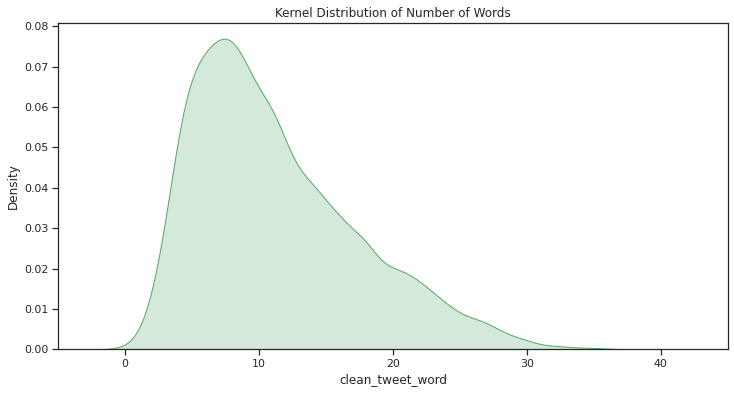

In [ ]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df['clean_tweet_word'], shade=True, color="g").set_title('Kernel Distribution of Number of Words')

Untuk lebih detailnya, kami memvisualisasikan jumlah kata pada tweet mengenai Final Piala Dunia 2022 menggunakan distribution plot dan kernel distribution. Terlihat bahwa jumlah kata yang paling sering ada pada tweet Final Piala Dunia 2022 adalah 8 kata dan terlihat juga bahwa jumlah tweet yang memiliki lebih dari 20 kata lebih sedikit daripada jumlah tweet yang memiliki kurang dari 20 kata sehingga plot distribusi jumlah kata miring ke kanan

# **NLP: Topic Modelling dan Sentiment Analysis**

##**Sentiment Analysis**

**Polaritas**

Polaritas mengacu pada penentuan sentimen cenderung pada positif, netral, atau negatif Polaritas berkisar antara -1 hingga +1, dimana -1 hingga 0 adalah sentimen negatif, rentang 0 hingga +1 sebagai sentimen positif, dan 0 adalah netral. Polaritas kalimat dihitung sebagai jumlah dari polaritas semua kata dibagi dengan jumlah kata.

**Subjektivitas**

Subjektivitas mengacu pada opini atau emosi individu. Subjektivitas berkisar antara 0.0 hingga 1.0 dimana 0.0 sangat objektif dan 1.0 sangat subjektif

In [ ]:
#NLP using Textblon
from textblob import TextBlob
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

In [ ]:
#Create two new columns to save the results of the created functions
df_translate['Subjectivity'] = df_translate['translate'].apply(getSubjectivity)
df_translate['Polarity'] = df_translate['translate'].apply(getPolarity)

In [ ]:
# Creating a function to classify or label the sentiments as negative, positive and neutral
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

In [ ]:
# Create a new column 'Sentiment'
df_translate['Sentiment'] = df_translate['Polarity'].apply(getSentiment)

Disebabkan sentiment bersifat netral terlalu banyak, maka kami memutuskan untuk tidak mengikutsertakan sentiment netral ke dalam analysis kami dan hanya mengambil tweet yang bersifat positif dan negatif

In [ ]:
#because neutral too many, only using positive and negative sentiment
filter = df_translate['Sentiment'].str.contains('Neutral')
df_translate = df_translate[~filter]

In [ ]:
df_translate

,Unnamed: 0,tweet,replies_count,retweets_count,likes_count,clean_tweet,translate,Subjectivity,Polarity,Sentiment
2,2,Biasanya grup yang tahun ini menang piala duni...,0,0,0,grup menang piala dunia depannya masuk perempa...,The Group won the World Cup in front of him en...,0.750000,0.800000,Positive
3,3,@MardaniAliSera Logikanya..... Kalau seadanya ...,0,1,7,logikanya seadanya lolos piala dunia semi fina...,Logically improvised to qualify for the semi -...,0.487500,-0.012500,Negative
4,4,gila üî•üî•üî•üî• final piala dunia terbaik,0,0,0,gila final piala dunia terbaik,Crazy Final of the Best World Cup,0.733333,0.133333,Positive
5,5,@Robbi_07 @idextratime Generasi emasnya aja cu...,0,0,5,generasi emasnya nembus final euro ama semi fi...,The golden generation penetrates the final eur...,0.750000,0.150000,Positive
6,6,Pemain Brighton and Hove Albion bermain di fin...,79,135,2646,pemain brighton and hove albion bermain final ...,Brighton and Hove Albion players play the Worl...,0.700000,0.400000,Positive
...,...,...,...,...,...,...,...,...,...,...
14398,15887,@ah___madd enak argen menang wkwkwk,1,0,0,madd enak argen menang wkwkwk,Madd is delicious AGEN wins wkwkwk,0.600000,0.650000,Positive
14399,15888,"mbappe keren tim nya yg kureng, smgt next mena...",0,0,0,mbappe keren tim kureng smgt next menang mbapp...,Mbappe Cool Team Kureng smgt Next to win my mb...,0.350000,0.383333,Positive
14400,15889,"bangun bangun liat kabar argen menang, yaa iya...",0,0,0,bangun bangun kabar argen menang iyalah udah,"wake up the news that Agen wins it, it's already",0.200000,0.300000,Positive
14402,15891,w sbnrnya dukung perancis si agak sedih tp gpp...,1,0,0,dukung perancis sedih argen menang,Support France Sad Argen Wins,0.600000,-0.100000,Negative


In [ ]:
# Delete neutral
filter = df_translate['Sentiment'].str.contains('Neutral')
df_translate_no_neutral = df_translate[~filter]

In [ ]:
cat = ['Sentiment']
df_translate_no_neutral[cat].describe()

,Sentiment
count,7597
unique,2
top,Positive
freq,5849


Sentiment pada tweet mengenai Final Piala Dunia Qatar 2022 lebih dominan positif, yaitu sebanyak 5849 tweet.

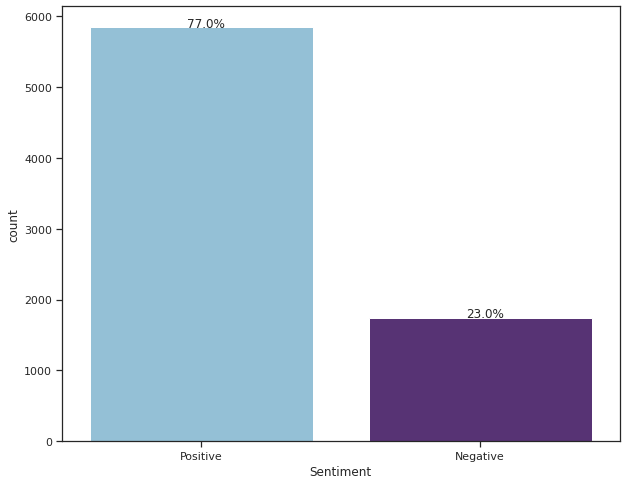

In [ ]:
# Create bar plot
def percent_data(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

plt.figure(figsize = (10,8))
ax = sns.countplot(data=df_translate_no_neutral, x='Sentiment',palette=["#89C4E1", "#58287F"])
percent_data(ax,df_translate_no_neutral.Sentiment)

Untuk lebih detailnya, kami memvisualisasikan sentiment menggunakan bar plot. Terlihat bahwa perbandingan antara sentiment positif dan negatif adalah sentiment positif sebesar 77% dan sentiment negatif sebesar 23%

In [ ]:
num = ['Subjectivity', 'Polarity']

In [ ]:
df_translate[num].describe()

,Subjectivity,Polarity
count,7597.000000,7597.000000
mean,0.616292,0.216406
std,0.248844,0.344594
min,0.000000,-1.000000
25%,0.433333,0.033333
50%,0.650000,0.200000
75%,0.800000,0.433333
max,1.000000,1.000000


*   Berdasarkan subjektivitas, rata-rata mendapat nilai 0.62, yang berarti sentiment tweet mengenai Final Piala Dunia 2022 cenderung bersifat subjektif
*   Berdasarkan polaritas, rata-rata mendapat nilai 0.22, yang berarti sentiment tweet mengenai Final Piala Dunia 2022 sedikit cenderung positif

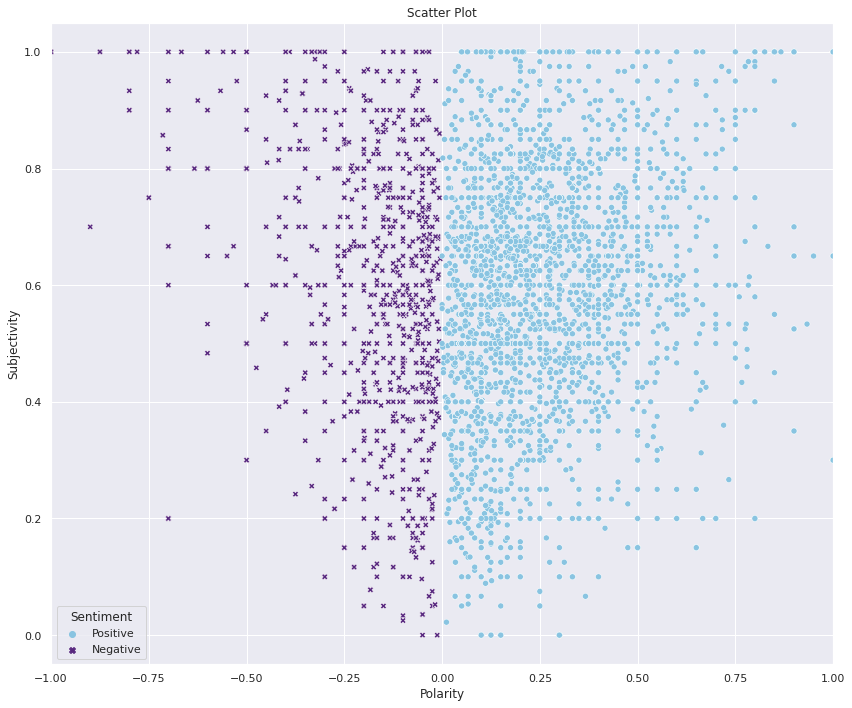

In [ ]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (12,10))

markers = {'Positive':'o','Negative':'X'}

sns.scatterplot(data=df_translate_no_neutral, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette=["#89C4E1", "#58287F"]).set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

Untuk detail subjektivitas dan polaritas, kami memvisualisasikan menggunakan scatter plot, terlihat bahwa sentiment tweet mengenai Final Piala Dunia 2022 cenderung bersifat subjektif dan positif.

##**Topic Modelling**

Topic Modelling adalah teknik *unsupervised learning* yang digunakan untuk merepresentasikan dokumen teks dengan bantuan beberapa topik. Salah satu proses Topic Modelling adalah *Latent Dirichlet Allocation* (LDA). LDA adalah model probabilistik generatif yang mengasumsikan setiap topik adalah campuran dari serangkaian kata yang mendasarinya, dan setiap dokumen adalah campuran dari sekumpulan probabilitas topik.

In [ ]:
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
id2word = Dictionary(df['lemmas'])
print(len(id2word))
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))
corpus = [id2word.doc2bow(d) for d in df['lemmas']]
base_model = LdaMulticore(corpus=corpus, num_topics=5, id2word=id2word, workers=12, passes=5)

16362
7328


Kami memilih 5 topik untuk ditampilkan sebagai *base model*. Selanjutnya, pada tahap *hyperparameter tuning*, jumlah topiknya akan mencapai optimum.

In [ ]:
# Filtering for words
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]

# Create Topics
topics = [' '.join(t[0:10]) for t in words]
for id, t in enumerate(topics):
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
dunia piala final argentina juara messi terbaik lionel selamat qatar

------ Topic 1 ------
argentina juara dunia messi piala final lionel prancis qatar pemain

------ Topic 2 ------
argentina final dunia piala juara prancis menang penalti argen adu

------ Topic 3 ------
argentina final juara dunia piala menang nonton udah gue pas

------ Topic 4 ------
argentina final juara kalah dunia menang settingan wasit piala kali



Hasil di atas merupakan tebakan kasar mengenai topik yang berkaitan dengan setiap kumpulan kata. Untuk setiap topik, kumpulan kata-kata telah diurutkan dari yang paling relevan hingga yang paling tidak relevan.

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity)

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=df['lemmas'],
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)


Perplexity:  -6.61060131100558

Coherence Score:  0.3007040893159078


Dilakukan perhitungan untuk *model perplexity* dan *topic coherence*, yaitu untuk mengukur seberapa baik model topik yang diperoleh. Terlihat bahwa nilai dari *coherence* sebesar 0.2977 adalah cenderung rendah sehingga mengindikasikan model topik yang telah diperoleh masih kurang baik. Namun, kembali lagi bahwa nilai tersebut hanya untuk *base model*. Selanjutnya, akan dibangun model LDA.

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(base_model, corpus, id2word)

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.093217  0.014652       1        1  28.779662
1     -0.080274  0.014228       2        1  24.895019
2     -0.004347 -0.012204       3        1  19.577021
3      0.065107 -0.091018       4        1  15.373842
4      0.112732  0.074342       5        1  11.374455, topic_info=        Term         Freq        Total Category  logprob  loglift
58     messi  3196.000000  3196.000000  Default  30.0000  30.0000
3      final  6247.000000  6247.000000  Default  29.0000  29.0000
19    menang  1582.000000  1582.000000  Default  28.0000  28.0000
56     kalah   723.000000   723.000000  Default  27.0000  27.0000
11    nonton   963.000000   963.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
6      piala   187.013340  7587.334982   Topic5  -4.5277  -1.5293
1317   argen    84.036860   654.307510   Topic5  -5.3276   0.1215
63      udah    74.426363   644.665614   Topic5  -5.4490   0.0149
166     fifa    67.644875   464.532332   Topic5  -5.5446   0.2470
29    pemain    64.410753   794.821057   Topic5  -5.5936  -0.3390

[430 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
157       1  0.228543       adu
157       2  0.087608       adu
157       3  0.632302       adu
157       4  0.013332       adu
157       5  0.038090       adu
...     ...       ...       ...
383       4  0.063538    zidane
383       5  0.015885    zidane
384       1  0.025544  zinedine
384       3  0.894042  zinedine
384       4  0.051088  zinedine

[1017 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

Setiap *bubble* di sebelah kiri mewakili setiap topik. Model topik yang baik akan memiliki *bubble* yang cukup besar, kemudian *bubble*-nya akan cenderung tersebar tanpa *overlap* dibandingkan berkumpul di suatu kuadran tertentu.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

#apply transformation
tf = vectorizer.fit_transform(df['clean_tweet']).toarray()

#tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

#Mengambil 10 Topics
number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model.fit(tf)

<>:5: DeprecationWarning:

invalid escape sequence \w

<>:5: DeprecationWarning:

invalid escape sequence \w

<ipython-input-51-b8fb6844981e>:5: DeprecationWarning:

invalid escape sequence \w



LatentDirichletAllocation(random_state=0)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,menang,1610.7,argentina,1511.1,argentina,2458.1,juara,867.5,argentina,2724.0,argentina,591.0,final,3210.8,final,1297.3,argentina,1993.7,final,898.4
1,argen,679.1,prancis,1181.5,juara,2395.1,argentina,839.9,juara,2265.2,juara,467.1,piala,2962.0,nonton,700.0,juara,1897.8,mbappe,886.0
2,argentina,457.5,dunia,1144.1,dunia,2039.9,bola,357.1,cup,478.1,dunia,442.6,dunia,2954.3,dunia,524.3,dunia,1486.5,piala,689.0
3,kalah,367.8,piala,1054.7,piala,1411.2,pemain,345.4,wasit,467.6,messi,390.4,terbaik,772.3,piala,519.6,piala,1234.2,dunia,666.0
4,gua,276.5,juara,726.6,messi,1161.5,negara,288.2,world,450.1,piala,318.0,seru,366.0,banget,273.4,messi,1174.9,gol,452.8
5,lawan,170.1,final,680.8,selamat,607.4,main,209.3,messi,358.1,the,293.1,nonton,287.2,pas,262.4,lionel,592.6,kylian,210.1
6,pas,150.7,penalti,664.8,lionel,335.8,kalah,206.5,fans,357.9,goat,222.9,qatar,271.3,gue,244.8,timnas,371.0,prancis,190.2
7,final,146.2,adu,572.6,qatar,286.8,kali,171.3,fifa,300.2,final,171.8,pertandingan,236.8,udah,214.7,bawa,360.2,hattrick,190.1
8,udah,142.1,perancis,276.7,tim,283.5,final,163.3,udah,220.2,all,157.6,prancis,173.9,seru,157.5,maradona,241.0,pemain,139.3
9,gue,133.2,babak,242.1,pemain,247.6,sepak,148.9,orang,188.4,prediksi,139.8,terseru,162.1,kemarin,153.1,martinez,173.6,menit,125.1


Dari hasil di atas, misal untuk Topic 5, dapat disimpulkan topik tersebut membahas mengenai Messi sebagai pemain Argentina, dengan kemenangannya di final piala dunia, dinobati sebagai The GOAT (Greatest Of All Time).

#**Regresi dan Klasifikasi**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [ ]:
tfidf_vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
tfidf = tfidf_vectoriser.fit_transform(df['clean_tweet'])

##**Split Data**

In [ ]:
train_bow = bow[:7597,:]
test_bow = bow[7597:,:]

#split data into train & valid set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow,df_translate['Sentiment'],
                                                        random_state=42,
                                                        test_size=0.2)

In [ ]:
train_tfidf = tfidf[:7597,:]
test_tfidf = tfidf[7597:,:]

#split data into train & valid set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf,df_translate['Sentiment'],
                                                        random_state=42,
                                                        test_size=0.2)

In [ ]:
def evaluate_model(model, x_test = xvalid_bow, y_test = yvalid):
    y_pred = model.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)

    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))
    print('-----')
    print('ROC AUC')

    plot_roc_curve(model, x_test, y_test)
    print('Area under Curve of the ROC:', roc_auc_score(y_test,
                                                       model.predict_proba(x_test)[:,1]))

##**Regresi Logistik**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

Accuracy: 0.7592105263157894
------
Confusion Matrix:

              precision    recall  f1-score   support

    Negative       0.36      0.08      0.12       345
    Positive       0.78      0.96      0.86      1175

    accuracy                           0.76      1520
   macro avg       0.57      0.52      0.49      1520
weighted avg       0.68      0.76      0.69      1520

------
Assuming 1 as positive, we get:

True Positive: 1128
True Negative: 26
False Positive: 319
False Negative: 47

Precision: 0.7795438838977194
Recall: 0.96
F1-Score: 0.8604118993135011
-----
ROC AUC
Area under Curve of the ROC: 0.534695035460993


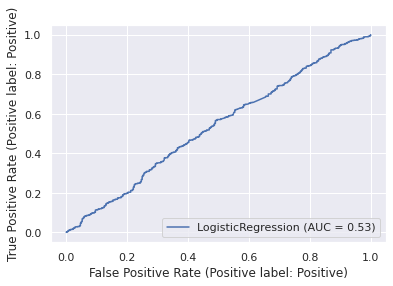

In [ ]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)
evaluate_model(lreg,xvalid_bow,yvalid)

Accuracy: 0.7736842105263158
------
Confusion Matrix:

              precision    recall  f1-score   support

    Negative       1.00      0.00      0.01       345
    Positive       0.77      1.00      0.87      1175

    accuracy                           0.77      1520
   macro avg       0.89      0.50      0.44      1520
weighted avg       0.82      0.77      0.68      1520

------
Assuming 1 as positive, we get:

True Positive: 1175
True Negative: 1
False Positive: 344
False Negative: 0

Precision: 0.7735352205398288
Recall: 1.0
F1-Score: 0.872308834446919
-----
ROC AUC
Area under Curve of the ROC: 0.5580598211532533


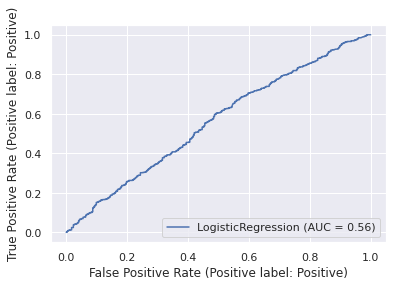

In [ ]:
lreg = LogisticRegression()
lreg.fit(xtrain_tfidf, ytrain)
evaluate_model(lreg,xvalid_tfidf,yvalid)

##**Naive Bayes**

Accuracy: 0.7361842105263158
------
Confusion Matrix:

              precision    recall  f1-score   support

    Negative       0.33      0.16      0.22       345
    Positive       0.79      0.90      0.84      1175

    accuracy                           0.74      1520
   macro avg       0.56      0.53      0.53      1520
weighted avg       0.68      0.74      0.70      1520

------
Assuming 1 as positive, we get:

True Positive: 1063
True Negative: 56
False Positive: 289
False Negative: 112

Precision: 0.7862426035502958
Recall: 0.9046808510638298
F1-Score: 0.8413138108428967
-----
ROC AUC
Area under Curve of the ROC: 0.5498008017267961


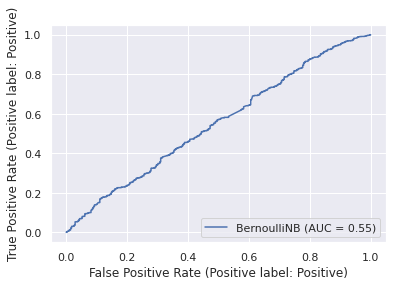

In [ ]:
naivebern_i = BernoulliNB()
naivebern_i.fit(xtrain_bow, ytrain)
evaluate_model(naivebern_i,xvalid_bow,yvalid)

Accuracy: 0.7697368421052632
------
Confusion Matrix:

              precision    recall  f1-score   support

    Negative       0.14      0.00      0.01       345
    Positive       0.77      0.99      0.87      1175

    accuracy                           0.77      1520
   macro avg       0.46      0.50      0.44      1520
weighted avg       0.63      0.77      0.67      1520

------
Assuming 1 as positive, we get:

True Positive: 1169
True Negative: 1
False Positive: 344
False Negative: 6

Precision: 0.7726371447455387
Recall: 0.9948936170212765
F1-Score: 0.8697916666666666
-----
ROC AUC
Area under Curve of the ROC: 0.505359235275979


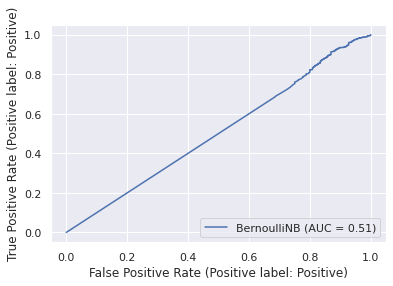

In [ ]:
naivebern_i = BernoulliNB()
naivebern_i.fit(xtrain_tfidf, ytrain)
evaluate_model(naivebern_i,xvalid_tfidf,yvalid)

##**Support Vector Machines**

Accuracy: 0.7585526315789474
------
Confusion Matrix:

              precision    recall  f1-score   support

    Negative       0.27      0.04      0.07       345
    Positive       0.77      0.97      0.86      1175

    accuracy                           0.76      1520
   macro avg       0.52      0.50      0.46      1520
weighted avg       0.66      0.76      0.68      1520

------
Assuming 1 as positive, we get:

True Positive: 1140
True Negative: 13
False Positive: 332
False Negative: 35

Precision: 0.7744565217391305
Recall: 0.9702127659574468
F1-Score: 0.8613524744994333
-----
ROC AUC
Area under Curve of the ROC: 0.5119901325932779


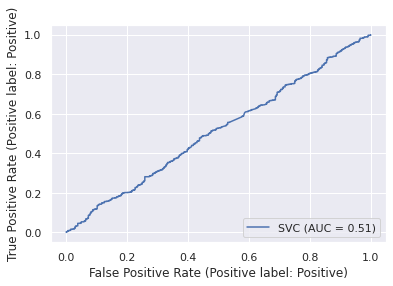

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1,probability= True)
svc.fit(xtrain_bow, ytrain)
evaluate_model(svc,xvalid_bow,yvalid)

Accuracy: 0.7710526315789473
------
Confusion Matrix:

              precision    recall  f1-score   support

    Negative       0.42      0.02      0.04       345
    Positive       0.78      0.99      0.87      1175

    accuracy                           0.77      1520
   macro avg       0.60      0.51      0.46      1520
weighted avg       0.70      0.77      0.68      1520

------
Assuming 1 as positive, we get:

True Positive: 1164
True Negative: 8
False Positive: 337
False Negative: 11

Precision: 0.7754830113257828
Recall: 0.9906382978723405
F1-Score: 0.8699551569506727
-----
ROC AUC
Area under Curve of the ROC: 0.4769497378970089


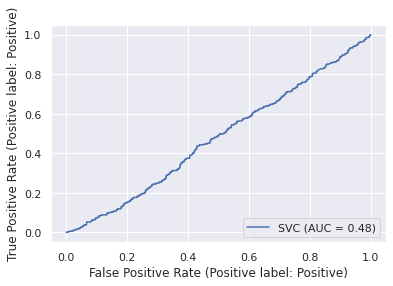

In [ ]:
svc = svm.SVC(kernel='linear', C=1,probability= True)
svc.fit(xtrain_tfidf, ytrain)
evaluate_model(svc,xvalid_tfidf,yvalid)

##**Random Forest**

Accuracy: 0.7039473684210527
------
Confusion Matrix:

              precision    recall  f1-score   support

    Negative       0.22      0.12      0.15       345
    Positive       0.77      0.88      0.82      1175

    accuracy                           0.70      1520
   macro avg       0.50      0.50      0.49      1520
weighted avg       0.65      0.70      0.67      1520

------
Assuming 1 as positive, we get:

True Positive: 1029
True Negative: 41
False Positive: 304
False Negative: 146

Precision: 0.7719429857464366
Recall: 0.8757446808510638
F1-Score: 0.8205741626794258
-----
ROC AUC
Area under Curve of the ROC: 0.5191748381128585


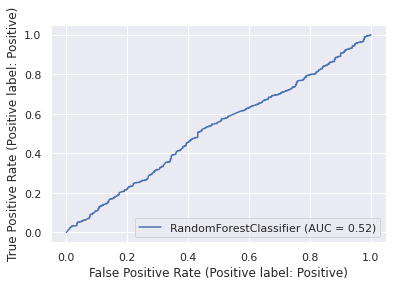

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain_bow, ytrain)
evaluate_model(rf,xvalid_bow,yvalid)

Accuracy: 0.7638157894736842
------
Confusion Matrix:

              precision    recall  f1-score   support

    Negative       0.33      0.04      0.07       345
    Positive       0.78      0.98      0.86      1175

    accuracy                           0.76      1520
   macro avg       0.55      0.51      0.47      1520
weighted avg       0.68      0.76      0.68      1520

------
Assuming 1 as positive, we get:

True Positive: 1147
True Negative: 14
False Positive: 331
False Negative: 28

Precision: 0.7760487144790257
Recall: 0.9761702127659575
F1-Score: 0.8646814926498304
-----
ROC AUC
Area under Curve of the ROC: 0.5290521122417515


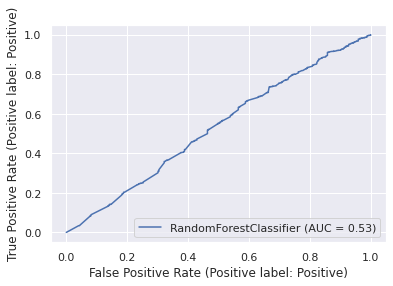

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain_tfidf, ytrain)
evaluate_model(rf,xvalid_tfidf,yvalid)

**Kesimpulan Regresi dan Klasifikasi**

Berdasarkan nilai yang diperoleh dari tiap model diperoleh bahwa best model-nya adalah model regresi logistik TF-IDF

# **Social Media Analysis (SMA)**

## **WordCloud**

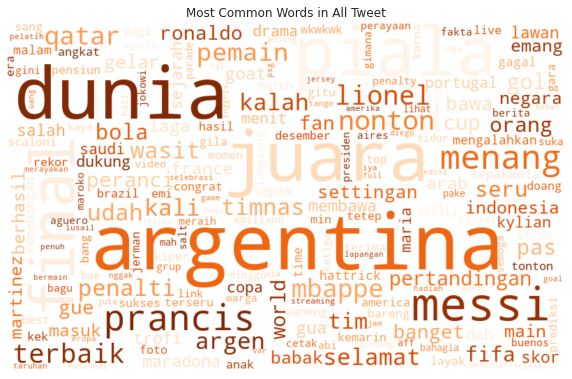

<Figure size 432x288 with 0 Axes>

In [ ]:
#visualizing all the words in our data using the wordcloud plot.
all_words = ' '.join([text for text in df['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21,colormap='Oranges',background_color="white",collocations=False, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common Words in All Tweet")
plt.show()
plt.savefig("cloud_1.jpg", format="jpg")
plt.show()

Berdasarkan wordcloud plot, terlihat bahwa kata yang paling sering muncul pada semua tweet mengenai Final Piala Dunia 2022  adalah "dunia", "argentina", "messi", "prancis", dan beberapa kata lainnya

In [ ]:
df_word = df['clean_tweet'].apply(lambda x:str(x).split()) #List of words in every row for text

top = Counter([item for sublist in df_word for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common Words','Count']
temp.style.background_gradient(cmap='Oranges')

,Common Words,Count
1,dunia,9298
2,juara,8630
3,piala,8195
4,final,6568
5,messi,3424
6,prancis,1854
7,menang,1618
8,nonton,987
9,terbaik,960
10,lionel,941


Untuk lebih detailnya, kami mencari jumlah tiap kata pada semua tweet mengenai Final Piala Dunia 2022. Dari sini, terlihat bahwa ternyata kata yang paling sering digunakan pada semua tweet mengenai Final Piala Dunia 2022 adalah "dunia" sebanyak 9298 kata, disusul dengan "juara", "piala", "final", dan kata lainnya

In [ ]:
#Split postive and negative sentiment
df_positive = df_translate[df_translate['Sentiment']=='Positive']
df_negative = df_translate[df_translate['Sentiment']=='Negative']

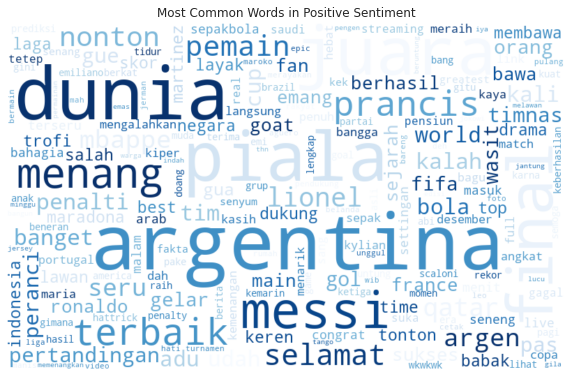

<Figure size 432x288 with 0 Axes>

In [ ]:
#visualizing all the words in our data which positive sentiment using the wordcloud plot.
all_words = ' '.join([text for text in df_positive['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21,colormap='Blues',background_color="white",collocations=False, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common Words in Positive Sentiment")
plt.show()
plt.savefig("cloud_1.jpg", format="jpg")
plt.show()

Berdasarkan wordcloud plot, terlihat bahwa kata yang paling sering muncul pada tweet mengenai Final Piala Dunia 2022 dengan sentiment positif adalah "dunia", "argentina", "messi", "menang", dan beberapa kata lainnya

In [ ]:
df_positive_word = df_positive['clean_tweet'].apply(lambda x:str(x).split()) #List of words in every row for text

top = Counter([item for sublist in df_positive_word for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common Words','Count']
temp.style.background_gradient(cmap='Blues')

,Common Words,Count
1,dunia,3950
2,piala,3494
3,juara,3328
4,final,2861
5,messi,1786
6,menang,1131
7,terbaik,903
8,prancis,796
9,selamat,526
10,pemain,497


Untuk lebih detailnya, kami mencari jumlah tiap kata pada tweet mengenai Final Piala Dunia 2022 dengan sentiment positif. Dari sini, terlihat bahwa ternyata kata yang paling sering digunakan pada tweet mengenai Final Piala Dunia 2022 dengan sentiment positif adalah "dunia" sebanyak 3950 kata, disusul dengan "piala", "juara", "final", dan kata lainnya

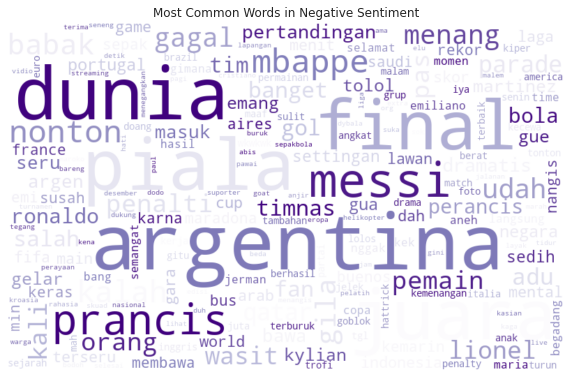

<Figure size 432x288 with 0 Axes>

In [ ]:
#visualizing all the words in our data which negative sentiment using the wordcloud plot.
all_words = ' '.join([text for text in df_negative['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21,colormap='Purples',collocations=False,background_color="white", max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common Words in Negative Sentiment")
plt.show()
plt.savefig("cloud_2.jpg", format="jpg")
plt.show()

Berdasarkan wordcloud plot, terlihat bahwa kata yang paling sering muncul pada tweet mengenai Final Piala Dunia 2022 dengan sentiment negatif adalah "dunia", "argentina", "messi", "prancis", dan beberapa kata lainnya.


In [ ]:
df_negative_word = df_negative['clean_tweet'].apply(lambda x:str(x).split()) #List of words in every row for text

top = Counter([item for sublist in df_negative_word for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common Words','Count']
temp.style.background_gradient(cmap='Purples')

,Common Words,Count
1,dunia,1087
2,piala,1025
3,juara,981
4,final,948
5,messi,380
6,prancis,285
7,mbappe,165
8,nonton,149
9,kalah,138
10,babak,128


Untuk lebih detailnya, kami mencari jumlah tiap kata pada tweet mengenai Final Piala Dunia 2022 dengan sentiment negatif. Dari sini, terlihat bahwa ternyata kata yang paling sering digunakan pada tweet mengenai Final Piala Dunia 2022 dengan sentiment negatif adalah "dunia" sebanyak 1087 kata, disusul dengan "piala", "juara", "final", dan kata lainnya

# **Social Network Analysis (SNA)**

## **Analisis SNA**

In [ ]:
!pip install twint
!pip install nest_asyncio
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.4/385.4 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 KB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.4 MB/s eta 0:00:00
  Created wheel for twint: filename=twint-2.1.20-py3-none-any.whl size=33929 sha256=3274330e80f53dd3570dd3644828fea7423929c2c9473270f0f5455e2ec172a7
  Stored in directory: /root/.cache/pip/wheels/4e/80/ea/5b82b5140b7dec857ec0bbfe908193ebf2e5d7f2ebee297519

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Mengimport modul
import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
import twint
import nest_asyncio
import networkx as nx

seed = 0
np.random.seed(seed)
"Done"

'Done'

In [ ]:
# Melihat beberapa username dengan tweetnya
print(df.shape)
data = df[['username', 'tweet']]
data.head()

(14456, 9)


,username,tweet
0,kabar6com,"Laga Final Piala Dunia, Bupati Zaki Jagokan Ar..."
1,rrex_xona,asam lambung naek gara¬≤ nonton final piala du...
2,vanilamacaroon,Biasanya grup yang tahun ini menang piala duni...
3,aikel112629,@MardaniAliSera Logikanya..... Kalau seadanya ...
4,ggmujos,gila üî•üî•üî•üî• final piala dunia terbaik


In [ ]:
users = data.username.to_list()
tweets = data.tweet.to_list()
print( users[:7] )

['kabar6com', 'rrex_xona', 'vanilamacaroon', 'aikel112629', 'ggmujos', 'anovaway', 'idextratime']


In [ ]:
G = nx.Graph() # Graph Kosong Baru
G.add_nodes_from(users)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  10074
Banyak Edges =  0


In [ ]:
import re

for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  12554
Banyak Edges =  6001


In [ ]:
print("Export ke GexF untuk di import ke Gephi")
nx.write_gexf(G, "Project.gexf")

Export ke GexF untuk di import ke Gephi


## **Centrality Analysis**

In [ ]:
import operator

def Centrality(G, N=10, method='katz', outliers=False, Label = True, layOut='shells'):
    if method.lower()=='katz':
        phi = 1.618033988749895 # largest eigenvalue of adj matrix
        ranking = nx.katz_centrality_numpy(G,1/phi)
    elif method.lower() == 'degree':
        ranking = nx.degree_centrality(G)
    elif method.lower() == 'eigen':
        ranking = nx.eigenvector_centrality_numpy(G)
    elif method.lower() =='closeness':
        ranking = nx.closeness_centrality(G)
    elif method.lower() =='betweeness':
        ranking = nx.betweenness_centrality(G)
    elif method.lower() =='harmonic':
        ranking = nx.harmonic_centrality(G)
    elif method.lower() =='percolation':
        ranking = nx.percolation_centrality(G)
    else:
        print('Error, Unsupported Method.'); return None

    important_nodes = sorted(ranking.items(), key=operator.itemgetter(1))[::-1]#[0:Nimportant]
    data = np.array([n[1] for n in important_nodes])
    dnodes = [n[0] for n in important_nodes][:N]
    if outliers:
        m = 1 # 1 standard Deviation CI
        data = data[:N]
        out = len(data[abs(data - np.mean(data)) > m * np.std(data)]) # outlier within m stDev interval
        if out<N:
            dnodes = [n for n in dnodes[:out]]

    print('Influencial Users: {0}'.format(str(dnodes)))
    print('Influencial Users Scores: {0}'.format(str(data[:len(dnodes)])))
    Gt = G.subgraph(dnodes)
    return Gt

def drawGraph(G, Label, layOut='spring', graphStyle=False, K = 200):
    if graphStyle:
        ranking = nx.degree_centrality(G)
        warna = list(ranking.values())
        d = nx.degree(G)
        d = [d[node]*K for node in G.nodes()]
        pos = nx.spring_layout(G) # Spring LayOut
        nx.draw_networkx_nodes(G,pos, node_color=warna,node_size=d) # Gambar Vertex
        nx.draw_networkx_edges(G,pos,width=2,alpha=0.1) # Gambar edges
        nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
        plt.show() # Show the graph
    else:
        if layOut.lower()=='spring':
            pos = nx.spring_layout(G)
        elif layOut.lower()=='circular':
            pos=nx.circular_layout(G)
        elif layOut.lower()=='random':
            pos = nx.random_layout(G)
        elif layOut.lower()=='shells':
            shells = [G.core_nodes,sorted(G.major_building_routers, key=lambda n: nx.degree(G.topo, n)) + G.distribution_routers + G.server_nodes,G.hosts + G.minor_building_routers]
            pos = nx.shell_layout(G, shells)
        elif layOut.lower()=='spectral':
            pos=nx.spectral_layout(G)
        else:
            print('Graph Type is not available.')
            return
        nx.draw_networkx_nodes(G,pos, alpha=0.2,node_color='blue',node_size=600)
        if Label:
            nx.draw_networkx_labels(G,pos)
        nx.draw_networkx_edges(G,pos,width=4)
        plt.show()

In [ ]:
# Degree Centrality
Gt = Centrality(G, N=10, method='degree', outliers=False, Label = True, layOut='spring')

Influencial Users: ['idextratime', 'SiaranBolaLive', 'FaktaSepakbola', 'aniesbaswedan', 'vidio', 'The', 'R', 'GOAL', 'registaco', 'convomfs']
Influencial Users Scores: [0.06237553 0.00971879 0.00900183 0.0048594  0.00414244 0.00390345
 0.00382379 0.00366446 0.0035848  0.00278818]


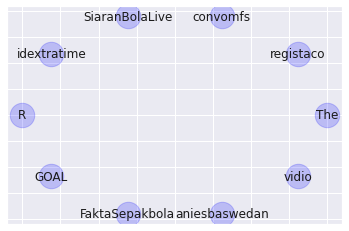

In [ ]:
drawGraph(Gt, True, layOut='circular')

Berdasarkan *output* di atas, node utama adalah user 'idextratime' dengan nilai 0.06237553, 'SiaranBolaLive' dengan nilai 0.00971879, 'FaktaSepakbola' dengan nilai 0.00900183, dan 'aniesbaswedan' dengan nilai 0.0048594. Node 'idextratime' adalah node dengan relasi terbanyak dan paling berpengaruh.

In [ ]:
# Closeness Centrality
Gt = Centrality(G, N=10, method='closeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['idextratime', 'saya_adalah2468', 'riombee', 'samferkyfers10', 'gilangseva1', 'terabhitiya', 'efremsiregar', 'deburombak', 'urboyyss24', 'mcflurrydeluxee']
Influencial Users Scores: [0.09263309 0.0760402  0.07508171 0.07482663 0.07418193 0.0734228
 0.07309978 0.07294214 0.07290844 0.07284676]


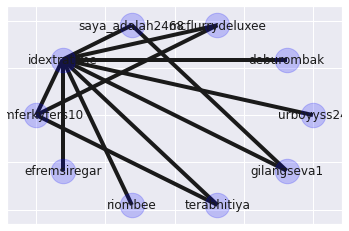

In [ ]:
drawGraph(Gt, True, layOut='circular')

Dari *output* di atas, terlihat bahwa akun twitter dengan username 'idextratime' dengan nilai 0.09263309 merupakan node dengan nilai closeness centrality paling tinggi. Node 'idextratime' memiliki kedekatan tertinggi dengan node lain dan merupakan node penting.

In [ ]:
# Betweenness Centrality
Gt = Centrality(G, N=10, method='betweeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['idextratime', 'jokowi', 'SiaranBolaLive', 'abjadbiru', 'FaktaSepakbola', 'registaco', 'aniesbaswedan', 'samferkyfers10', 'GOAL', 'PSSI']
Influencial Users Scores: [0.06096893 0.0091278  0.00905718 0.00835965 0.00645203 0.0048523
 0.00406585 0.00360019 0.00352095 0.0034379 ]


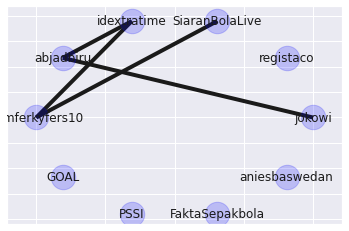

In [ ]:
drawGraph(Gt, True, layOut='circular')

Dari *output* di atas, terlihat bahwa akun twitter dengan username 'idextratime' dengan nilai 0.06096893 merupakan node dengan nilai betweenness centrality paling tinggi. Node 'idextratime' merupakan node yang paling sering menjadi penghubung.

In [ ]:
# Eigenvector Centrality
Gt = Centrality(G, N=10, method='eigen', outliers=False, Label = True, layOut='spring')

Influencial Users: ['idextratime', 'samferkyfers10', 'nextjack1995', 'gilangseva1', 'orrshktse', 'saya_adalah2468', 'stadiuvm', 'anovaway', 'triwantororudi', 'indigoblok']
Influencial Users Scores: [0.70229034 0.03213827 0.03210805 0.03171923 0.03008965 0.03002287
 0.02991121 0.02980394 0.0289518  0.0287414 ]


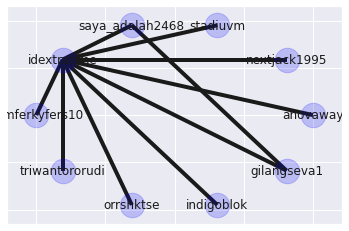

In [ ]:
drawGraph(Gt, True, layOut='circular')

Dari *output* di atas, terlihat bahwa akun twitter dengan username 'idextratime' dengan nilai 0.70229034 merupakan node dengan nilai eigenvector centrality paling tinggi. Node 'idextratime' merupakan node yang paling terhubung dengan node yang memiliki hubungan tinggi dengan node lainnya.

**Kesimpulan Centrality Analysis**

Dari seluruh *output* centrality analysis di atas, node 'idextratime' merupakan node yang paling berpengaruh dalam topik pembicaraan mengenai Final Piala Dunia 2022 di Twitter.

## **Visualisasi di Gephi**

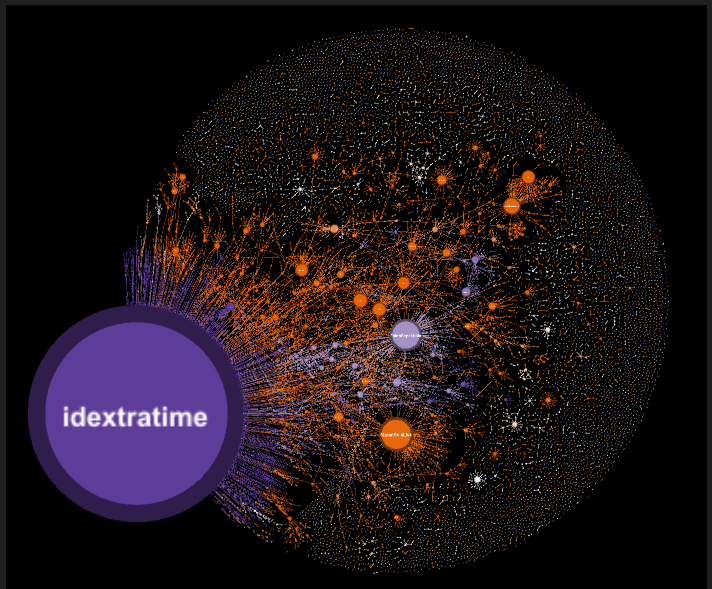

Dapat terlihat pada graph bahwa node 'idextratime' merupakan node yang paling berpengaruh dalam topik pembicaraan mengenai Final Piala Dunia 2022 di Twitter. Hasil yang didapatkan bersesuaian dengan hasil yang didapatkan pada Centrality Analysis.

## **Community Detection**

In [ ]:
# Mengimpor modul yang dibutuhkan
import networkx as nx
import networkx.algorithms.community as nxcom

In [ ]:
# Melihat komunitas
Gt = nxcom.greedy_modularity_communities(G)
for community in Gt:
    print(community)

Streaming output truncated to the last 5000 lines.
frozenset({'wildanyasin'})
frozenset({'gilafilmid'})
frozenset({'prastowo_dwi'})
frozenset({'naranika_'})
frozenset({'akbarino'})
frozenset({'ragielus'})
frozenset({'deddyhernandez'})
frozenset({'mhmmdnizar'})
frozenset({'joniprtm'})
frozenset({'bahassoalfess'})
frozenset({'edwighty'})
frozenset({'yogardtya'})
frozenset({'shhrul_n'})
frozenset({'dwinawan_'})
frozenset({'nicoag'})
frozenset({'theflankerid'})
frozenset({'telokbiye'})
frozenset({'aljjk97'})
frozenset({'faktasepakbola'})
frozenset({'iihamzada'})
frozenset({'myjeongooo'})
frozenset({'zaim_ahya'})
frozenset({'ponakannyaom'})
frozenset({'iniozy'})
frozenset({'bolalokal'})
frozenset({'gsp1209'})
frozenset({'sanying19'})
frozenset({'gemafebrian'})
frozenset({'meme_kampret'})
frozenset({'jamessimatup_11'})
frozenset({'betakopites'})
frozenset({'pandu_wicaksono'})
frozenset({'bangsatsat'})
frozenset({'adhanramdan'})
frozenset({'asgharsaleh'})
frozenset({'gyu8ie'})
frozenset({'zai

In [ ]:
# Melihat jumlah komunitas
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
print(len(communities))

7643


Berdasarkan Community Detection, terdapat komunitas sebanyak 7643 pada tweet mengenai Final Piala Dunia 2022.

# **Kesimpulan**

Dengan demikian, setelah dilakukan analisis mengenai Topik Final Piala Dunia 2022 Qatar dapat ditarik beberapa kesimpulan respons masyarakat Indonesia terhadap kemenangan Argentina melawan Prancis, yaitu
*   Berdasarkan EDA, rata-rata tweet mengenai Final Piala Dunia 2022 mendapatkan 1-2 reply, 2-3 retweet, 4-15 like, dan memiliki 11-12 kata.
*   Berdasarkan EDA, jumlah kata yang paling sering terdapat pada tweet Final Piala Dunia 2022 adalah 8 kata dan jumlah tweet yang memiliki lebih dari 20 kata lebih sedikit daripada jumlah tweet yang memiliki kurang dari 20 kata, sehingga plot distribusi dari jumlah kata miring ke kanan
* Berdasarkan Sentiment Analysis, masyarakat Indonesia merespons positive atau senang dengan keberhasilan Argentina memenangkan Piala Dunia 2022. Hal ini semakin didukung karena laga Piala Dunia 2022 merupakan laga Piala Dunia terakhir pemain terhebat Argentina saat ini, yaitu Lionel Messi sebelum beliau pensiun dari Timnas Sepak Bola Argentina.
* Berdasarkan Sentiment Analysis, masyarakat Indonesia merespons secara subjective yang berarti menduga-duga berdasarkan perasaan atau selera masing-masing individu terhadap pertandingan Final Piala Dunia 2022.
* Berdasarkan Topic Modelling, lima base topik mengenai Final Piala Dunia 2022 adalah argentina messi menang juara dunia final prancis, nonton final piala dunia cup argentina juara messi prancis mbappe, argentina messi menang final juara piala dunia prancis mbappe kalah, argentina lionel messi juara final piala dunia prancis pemain qatar, final piala dunia terbaik argentina prancis seru nonton settingan juara.
* Berdasarkan Social Media Analytics, enam kata yang paling banyak dibicarakan pada tweet mengenai Final Piala Dunia 2022 adalah "dunia", "juara", "piala", “final”, “messi”, dan "prancis".
* Berdasarkan Social Network Analytics, akun dengan username ‘idextratime’ merupakan akun yang memiliki pengaruh terbesar dan relasi terbanyak dan terdapat 7643 komunitas pada tweet mengenai Final Piala Dunia 2022.


